In [1]:
#Generate data
import numpy as np

n = 100
synthetic_data = np.empty((n*n,3))

x = np.linspace(1,20,n)
y = np.linspace(1,20,n)

for i in range(n):
    for j in range(n):
        synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],(x[i]-10.0)**2-(y[j]-15)])
        #synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],0.5*(x[i]-10.0)-2*y[j]])


#Shuffle contents
np.random.shuffle(synthetic_data)

<IPython.core.display.Javascript object>


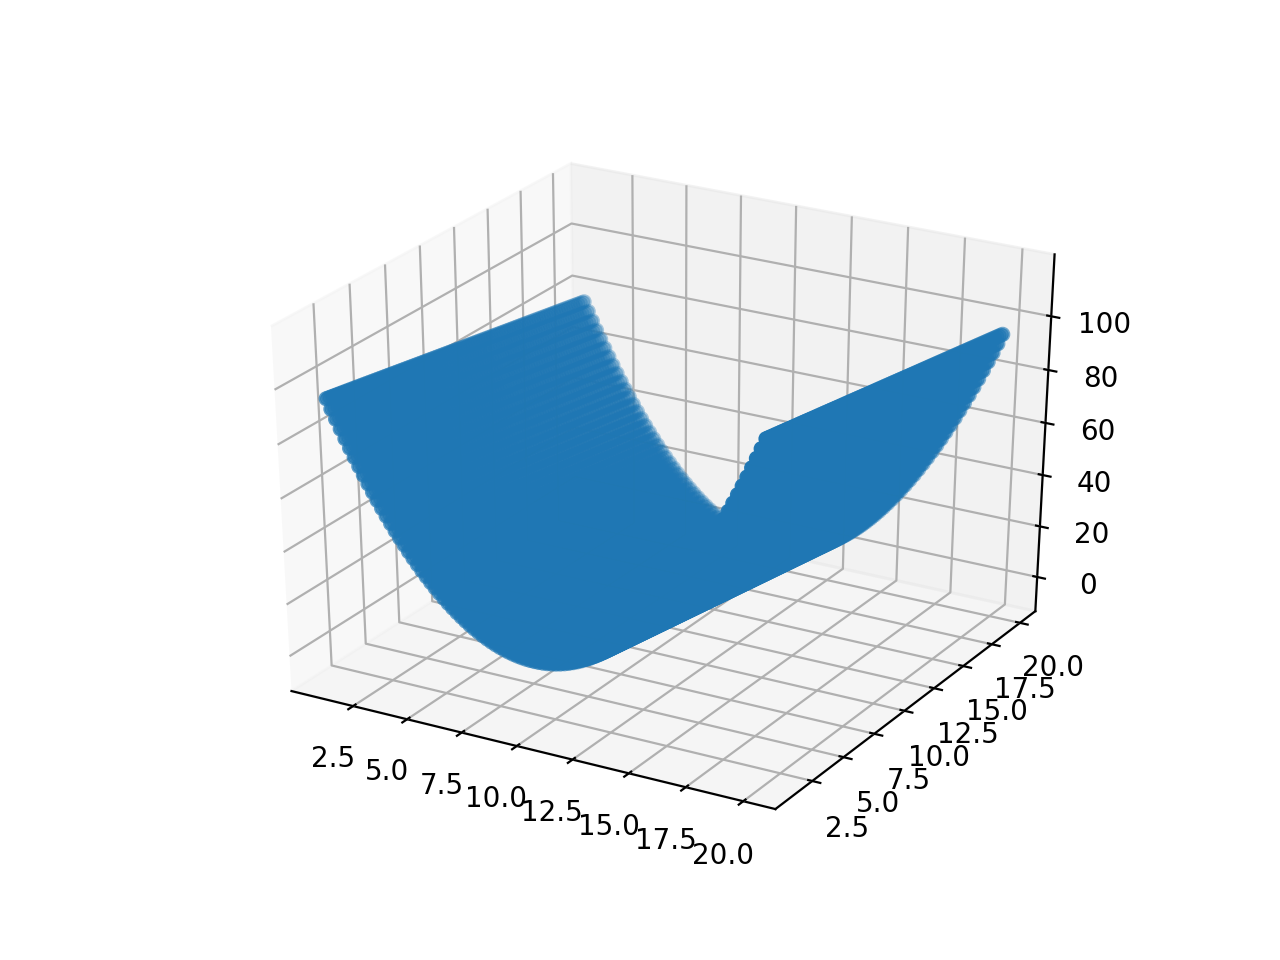

In [2]:
#Graph this data to be sure it is what we want
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_data[:,0], synthetic_data[:,1], synthetic_data[:,2])

In [3]:
#Helper functions
def normalise(x):
    """Convert values to range 0-1"""
    x_h = (x - x.min())*1.0 / (x.max() - x.min())
    
    return x_h, x.min(), x.max()

def un_normalise(x_h, x_min, x_max):
    """Convert values from range 0-1 back to normal"""
    x = (x_max-x_min)*x_h + x_min
    
    return x

In [4]:
#Now let's try with an autoencoder
import tensorflow as tf
#Prepare for training and validation with a 70:30 split
split_size = int(synthetic_data.shape[0]*0.7)

#Normalise values
#x_in, x_min, x_max = normalise(synthetic_data)

x_in = synthetic_data

#Remember that for autoencoders we don't need to have any targets since the values themselves are the targets
#train_x, val_x = x[:split_size], x[split_size:]


# number of neurons in each layer
input_num_units = 3
hidden_num_units = 3
output_num_units = 3

# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
x_h = tf.placeholder(tf.float32, [None, output_num_units])


# define weights and biases of the neural network 

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units])),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units]))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units])),
    'output': tf.Variable(tf.random_normal([output_num_units]))
}

In [6]:
# hidden = sigmoid(x*w_h+b_h)
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.sigmoid(hidden_layer)
#output_layer = hidden*w_o+b_o
#output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']
output_layer = tf.matmul(hidden_layer, tf.transpose(weights['hidden'])) + biases['output']

#Define cost
cost = tf.reduce_mean(tf.pow(output_layer - x_h, 2))
cross_entropy = -tf.reduce_sum(output_layer*tf.log(x_h))
#Choose Optimiser
optimiser = tf.train.AdamOptimizer(0.001).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


n_rounds = 20000
batch_size = 10000
loss_vector = np.empty(n_rounds)

0 nan 227.907
1000 nan 231.27
2000 nan 220.525
3000 nan 221.688
4000 nan 225.217
5000 nan 222.719
6000 nan 224.852
7000 nan 220.947
8000 nan 220.317
9000 nan 223.2
10000 nan 223.749
11000 nan 216.187
12000 nan 217.709
13000 nan 220.376
14000 nan 221.073
15000 nan 223.327
16000 nan 214.687
17000 nan 216.441
18000 nan 220.729
19000 nan 216.266


<IPython.core.display.Javascript object>


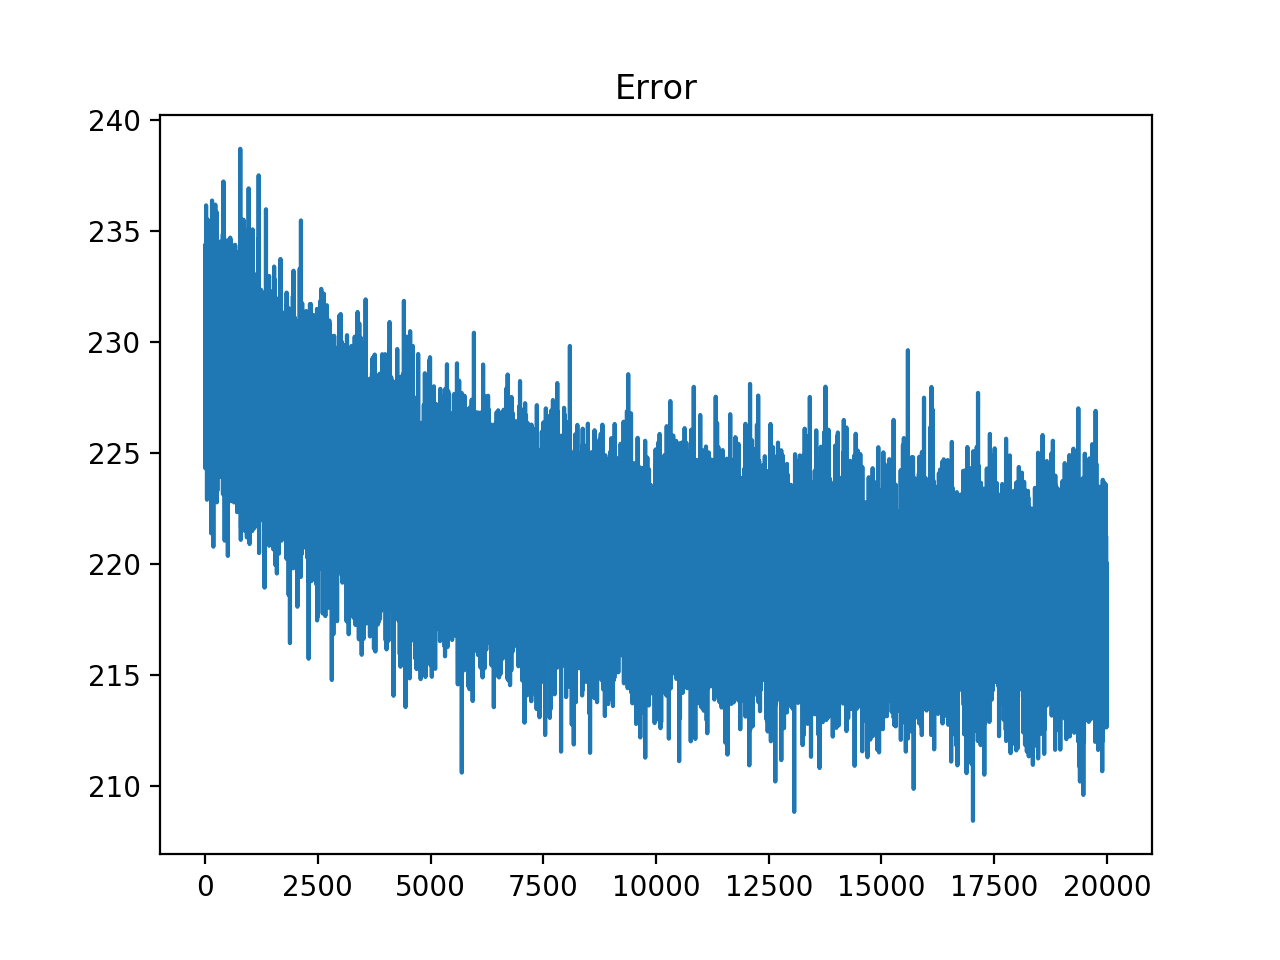

In [8]:
#Training loop

#TODO: add validation since it most likely overfits!

for i in range(n_rounds):
    sample = np.random.randint(n*n, size=batch_size)
    batch_xs = x_in[sample][:]
    batch_ys = x_in[sample][:]
    sess.run(optimiser, feed_dict={x: batch_xs, x_h:batch_ys})
    loss_vector[i] = sess.run(cost, feed_dict={x: batch_xs, x_h:batch_ys})
    if i % 1000 == 0:
        print i, sess.run(cross_entropy, feed_dict={x: batch_xs, x_h:batch_ys}), sess.run(cost, feed_dict={x: batch_xs, x_h:batch_ys})
        
fig = plt.figure()
plt.plot(loss_vector)
plt.title('Error')
plt.show()

In [9]:
print 'W_h:',sess.run(weights['hidden'])
W_h = sess.run(weights['hidden'])
print 'B_h:',sess.run(biases['hidden'])
B_h = sess.run(biases['hidden'])
print 'W_o:',sess.run(weights['output'])
W_o = sess.run(weights['output'])
print 'B_o:',sess.run(biases['output'])
B_o = sess.run(biases['output'])

W_h: [[  7.08899498   6.12209892 -11.18304729]
 [  7.36945486   8.44130802 -16.92272186]
 [  5.03460598   5.14588308  25.96039963]]
B_h: [  0.24664713  -0.55900389 -33.2739296 ]
W_o: [[ 0.02779684 -0.12190005  0.78080153]
 [ 1.66292858  1.69413364 -1.09501863]
 [-0.09383749 -0.21885513 -1.26764262]]
B_o: [ 5.62536955  7.28848743  5.95307732]


In [10]:
#downscale synthetic data
reconstructed_data = np.empty((n*n,3))
def sigmoid (x): return 1/(1 + np.exp(-x))  
def relu(x): return np.maximum(x, 0)


for i in range(len(x_in)):    
    reconstructed_data[i,:] = np.dot(sigmoid(np.dot(x_in[i,:],W_h)+B_h),W_h.T)+B_o
    #print np.mean(np.power(reconstructed_data[i,:]-x_in[i,:],2))
#reconstructed_data = un_normalise(reconstructed_data, x_min, x_max)

<IPython.core.display.Javascript object>


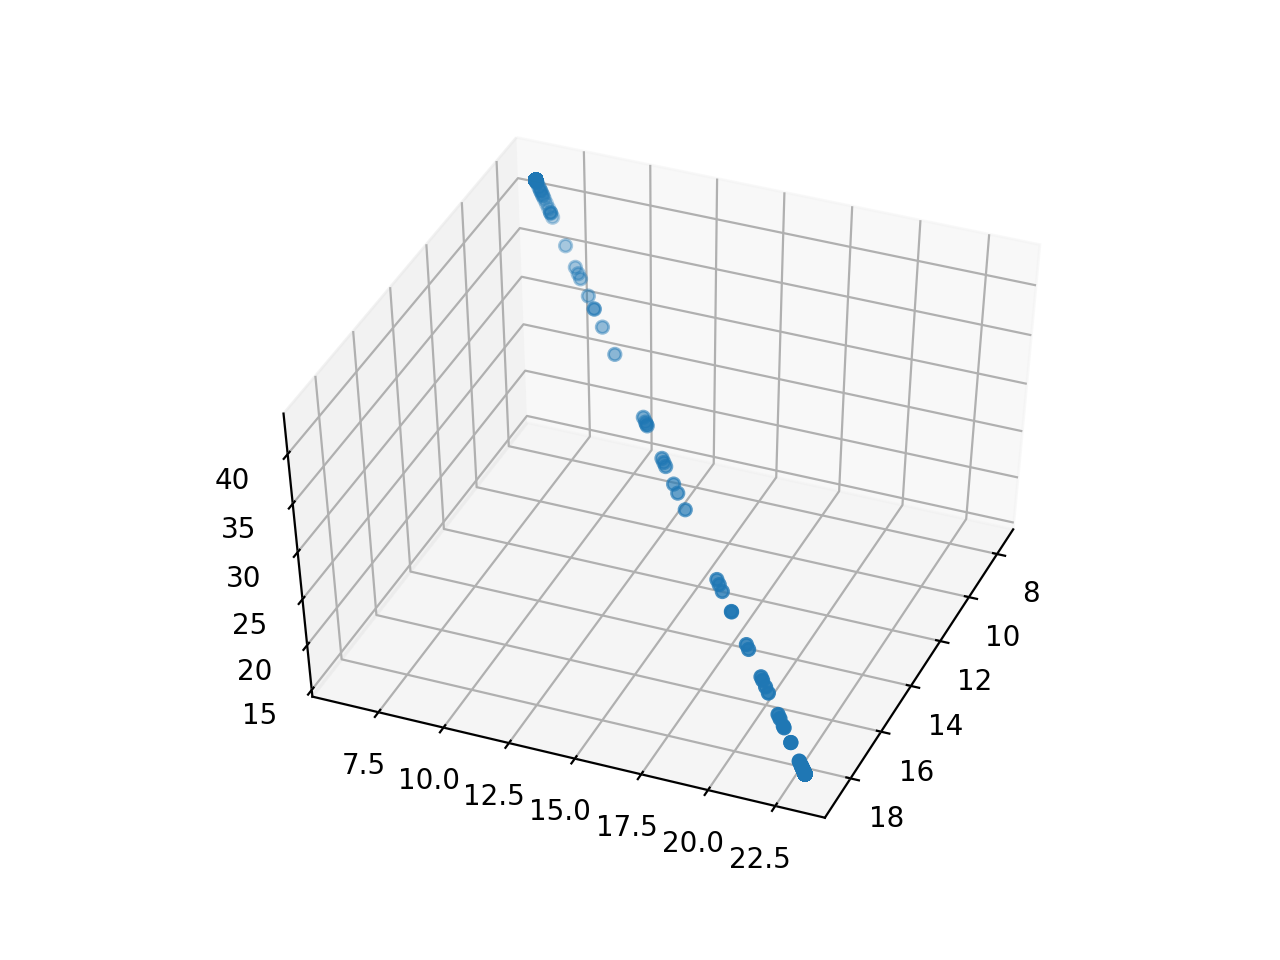

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], reconstructed_data[:,2])

In [10]:
np.savetxt('reconstructed.csv', reconstructed_data, delimiter=",")
np.savetxt('synthetic.csv', synthetic_data, delimiter=",")